In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import sys

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
sys.path.append('..')
from utils import visualizing_colors
from utils import preprocessing_file
from utils.algorithm_simulated_annealing import SimulatedAnnealing

In [3]:
MIN_NO_DIM = 1
MAX_NO_DIM = 10
NO_COLORS = 5
COMB_COLORS = 3

#### Preprocessing file

In [4]:
data = [
    ['color_0','color_1','color_2',3],
    ['color_0','color_1','color_3',5],
    ['color_0','color_1','color_4',2],
    ['color_0','color_2','color_3',5],
    ['color_0','color_2','color_4',3],
    ['color_0','color_3','color_4',1],
    ['color_1','color_2','color_3',10],
    ['color_1','color_2','color_4',5],
    ['color_1','color_3','color_4',7],
    ['color_2','color_3','color_4',3]
]

In [5]:
df = pd.DataFrame(data, columns=['center', 'left', 'right', 'slider'])
assert df.shape[1] == 4

In [6]:
df.head()

,center,left,right,slider
0,color_0,color_1,color_2,3
1,color_0,color_1,color_3,5
2,color_0,color_1,color_4,2
3,color_0,color_2,color_3,5
4,color_0,color_2,color_4,3


In [7]:
df_color = preprocessing_file.preprocess_three_colors(df, NO_COLORS)
df_color = preprocessing_file.adjust_slider(df_color, no_colors=3)
print(f'Dataframe shape: {df_color.shape}')

Dataframe shape: (10, 4)


In [8]:
df_color

,center,left,right,slider
0,0,1,2,0.8
1,0,1,3,1.0
2,0,1,4,0.7
3,0,2,3,1.0
4,0,2,4,0.8
5,0,3,4,0.6
6,1,2,3,1.5
7,1,2,4,1.0
8,1,3,4,1.2
9,2,3,4,0.8


#### Two dimensions

In [9]:
NO_DIM = 2

In [10]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10
# bounds
bounds = np.array([[-1.0, 1.0]] * NO_COLORS * NO_DIM)

Done!
f([-0.34658964  0.22675356  0.55621881  0.73297323  0.72081295  0.25830064
  0.10314708 -0.40270041  0.51822494  0.71825883]) = 0.429286


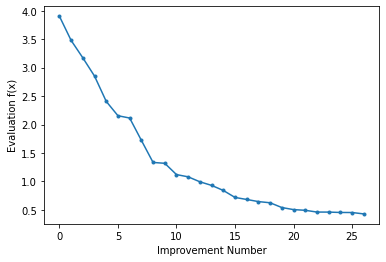

In [11]:
simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, NO_DIM, COMB_COLORS)
best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)
simulated_annealing.plot_iteration_curve(scores)
print('Done!')
print('f(%s) = %f' % (best, score))

In [12]:
_, dist_s = simulated_annealing.objective_three_colors(df_color, best)
dist_s

,real,estimated
0,0.8,0.801087
1,1.0,0.958796
2,0.7,0.720955
3,1.0,1.059908
4,0.8,0.726282
5,0.6,0.588237
6,1.5,1.498289
7,1.0,1.026674
8,1.2,1.032598
9,0.8,0.824864


Color 0 [0.4876912  0.44736788]
Color 1 [-0.4837521   0.09012935]
Color 2 [-0.22992628 -0.34343466]
Color 3 [ 0.67386539 -0.30350801]
Color 4 [-0.44787821  0.10944544]


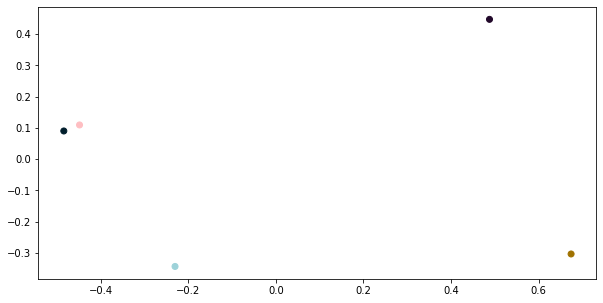

In [13]:
visualizing_colors.embedding(best, NO_DIM)

#### Four dimensions

In [14]:
NO_DIM = 4

In [15]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10
# bounds
bounds = np.array([[-1.0, 1.0]] * NO_COLORS * NO_DIM)

Done!
f([ 1.49344971  0.36640672 -0.41969641  0.52020747 -1.29772017  1.15240476
  0.52270151  2.05556616  0.7030018  -0.36187531  0.39111841 -2.11754935
  0.15025572  0.14257474  1.44358531  0.18071171  2.15588739  0.00853189
 -0.53582666 -1.79279327]) = 0.418802


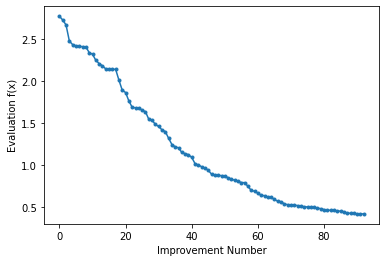

In [16]:
simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, NO_DIM, COMB_COLORS)
best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)
simulated_annealing.plot_iteration_curve(scores)
print('Done!')
print('f(%s) = %f' % (best, score))

In [17]:
_, dist_s = simulated_annealing.objective_three_colors(df_color, best)
dist_s

,real,estimated
0,0.8,0.796713
1,1.0,0.992009
2,0.7,0.721874
3,1.0,1.002905
4,0.8,0.665106
5,0.6,0.591702
6,1.5,1.506190
7,1.0,0.998874
8,1.2,0.967903
9,0.8,0.800139


Color 0 [0.01201854 1.31354434]
Color 1 [3.10410578 0.04285725]
Color 2 [-1.63156025 -1.08369524]
Color 3 [ 0.77643939 -0.8340978 ]
Color 4 [-2.26100346  0.56139145]


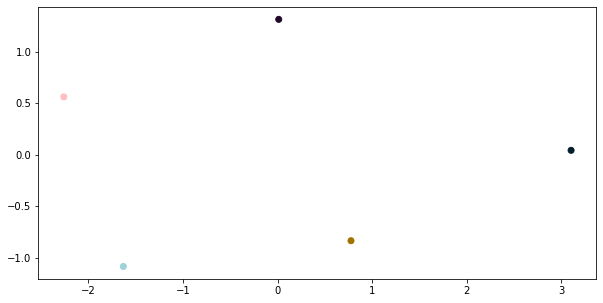

In [18]:
visualizing_colors.embedding(best, NO_DIM)

#### Iterate number of dimensions

In [19]:
# define the total iterations
no_iterations = 1000
# define the maximum step size
step_size = 0.05
# initial temperature
temp = 10

No dim 1 with score: 0.48812654863281935
No dim 2 with score: 0.4362889914253062
No dim 3 with score: 0.41865202976647475
No dim 4 with score: 0.4062662579018945
No dim 5 with score: 0.42794238650987293
No dim 6 with score: 0.4766712615608695
No dim 7 with score: 0.47670382775246034
No dim 8 with score: 0.49712176032652733
No dim 9 with score: 0.5238649169027833


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9')]

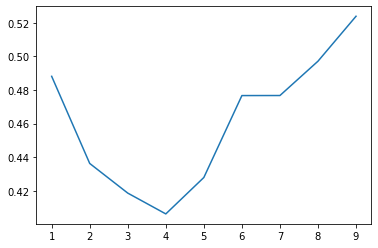

In [20]:
score_s = []
for no_dim in range(MIN_NO_DIM, MAX_NO_DIM):
    bounds = np.array([[-1.0, 1.0]] * NO_COLORS * no_dim)    
    simulated_annealing = SimulatedAnnealing(no_iterations, step_size, temp, NO_COLORS, no_dim, COMB_COLORS)
    best, score, scores = simulated_annealing.run(df_color, bounds, no_iterations, step_size, temp)  
    print(f'No dim {no_dim} with score: {score}')
    score_s.append(score)
fig, axs = plt.subplots()
axs.plot(score_s)
labels = np.arange(0, MAX_NO_DIM)
axs.set_xticklabels(labels)